## Ajuste de curvas: emision CO2
**Integrantes**


In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import optimize as opt

In [19]:
data = pd.read_csv("annual-co2-emissions-per-country.csv")

In [151]:
# Aqui se agregan los codigos de paises para analizar
#Code = ['USA', 'MEX', 'FRA', 'GBR', 'KOR', 'CHN']
Code = ['CHN', 'USA', 'IND', 'RUS', 'JPN']
min_year = 1950

In [152]:
def retrieve_data(Code):
    country_data = []
    for i in range(len(Code)):
        country_data.append(pd.DataFrame(data[(data['Code'] == Code[i]) & (data['Year'] >= min_year)].values, columns = ['Entity', 'Code', 'Year', 'Annual CO2 emissions']))
    return country_data

In [153]:
country_data = retrieve_data(Code)

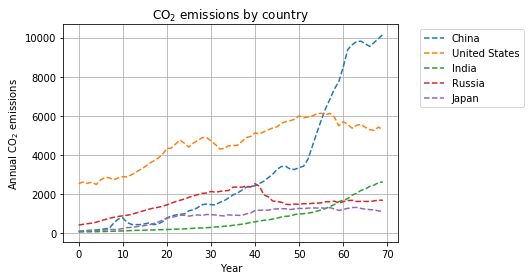

In [154]:
plt.figure(figsize=(6,4))
for i in range(len(Code)):
    plt.plot(country_data[i]['Year'] - min_year, country_data[i]['Annual CO2 emissions'], '--', label=country_data[i]['Entity'][0])
    
plt.xlabel('Year')
plt.ylabel('Annual CO$ _2$ emissions')
plt.title('CO$ _2$ emissions by country')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [155]:
# BOX 1

In [156]:
# BOX 1 MIN SQ N
def min_sq_N(beta, x_points, y_points, N):
    n = len(x_points)
    poli_N = np.array([beta[i] * x_points**i for i in range(N + 1)]).sum(axis=0)
    return (1 / (2 * n)) * ((y_points - poli_N)**2).sum()

In [157]:
# BOX 2

In [158]:
# BOX 2 MIN SQ N
error = []
error_country = []
min_poli = 1
max_poli = 5

for j in range(len(Code)):
    error_country = []
    for i in range(min_poli, max_poli):
        beta_ini = np.zeros(i + 1)
        solucion = opt.minimize(fun=min_sq_N, 
                                x0=beta_ini, 
                                args=(country_data[j]['Year'] - min_year, country_data[j]['Annual CO2 emissions'], i))
        error_country.append(solucion.fun)
    error.append(error_country)

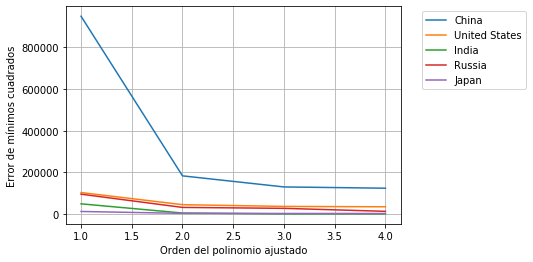

In [159]:
plt.figure(figsize=(6, 4))
for i in range(len(error)):
    plt.plot(range(min_poli, max_poli), error[i], label=country_data[i]['Entity'][0])
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error de mínimos cuadrados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

In [160]:
# BOX 3

In [161]:
# BOX 3 MIN SQ N
beta_graf = []
poli = []
for i in range(len(Code)):
    poli.append(int(np.argmin(error[i]) + min_poli))
    solucion = opt.minimize(fun=min_sq_N,
                            x0=np.zeros(poli[i] + 1),
                            args=(country_data[i]['Year'] - min_year, country_data[i]['Annual CO2 emissions'], poli[i]))
    beta_graf.append(solucion.x)

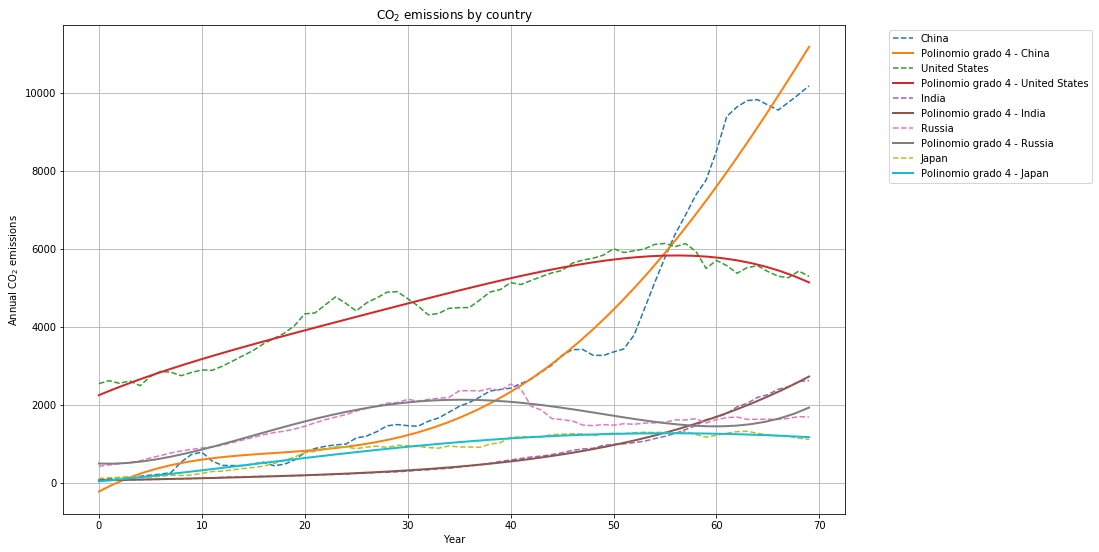

In [162]:
plt.figure(figsize=(14,9))
for i in range(len(Code)):
    Country_name = country_data[i]['Entity'][0]
    plt.plot(country_data[i]['Year'] - min_year, country_data[i]['Annual CO2 emissions'], '--', label=Country_name)
    x_num = np.linspace(min(country_data[i]['Year']) - min_year, max(country_data[i]['Year']) - min_year)
    y_fit = np.array([beta_graf[i][j] * x_num**j for j in range(poli[i] + 1)]).sum(axis=0)
    plt.plot(x_num, y_fit, lw=2, label=f'Polinomio grado {poli[i]} - {Country_name}')
    
plt.xlabel('Year')
plt.ylabel('Annual CO$ _2$ emissions')
plt.title('CO$ _2$ emissions by country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

In [ ]:
# BOX 1 MIN SQ N RIDGE
L = 100
def min_sq_N_ridge(beta, x_points, y_points, N, l):
    n = len(x_points)
    poli_N = np.array([beta[i] * x_points**i for i in range(N + 1)]).sum(axis=0)
    return (1 / (2 * n)) * ((y_points - poli_N)**2).sum() + l * np.linalg.norm(beta)**2

In [ ]:
# BOX 2 MIN SQ N RIDGE
error = []
error_country = []
max_poli = 4

for j in range(len(Code)):
    error_country = []
    for i in range(1, max_poli):
        beta_ini = np.zeros(i + 1)
        solucion = opt.minimize(fun=min_sq_N_ridge, 
                                x0=beta_ini, 
                                args=(country_data[j]['Year'] - min_year, country_data[j]['Annual CO2 emissions'], i, L))
        error_country.append(solucion.fun)
    error.append(error_country)

In [ ]:
# BOX 3 MIN SQ N RIDGE
beta_graf = []
poli = []
for i in range(len(Code)):
    poli.append(int(np.argmin(error[i]) + 1))
    solucion = opt.minimize(fun=min_sq_N_ridge,
                        x0=np.zeros(poli[i] + 1),
                        args=(country_data[i]['Year'] - min_year, country_data[i]['Annual CO2 emissions'], poli[i], L))
    beta_graf.append(solucion.x)

In [ ]:
# BOX 1 MIN SQ ROB
def huber(a, d):
    if np.abs(a) <= d:
        return a**2
    else:
        return d * (2 * np.abs(a) - d)
    
def min_sq_rob(beta, x_points, y_points, N):
    n = len(x_points)
    poli = np.array([beta[i] * x_points**i for i in range(N + 1)]).sum(axis=0)
    return (1 / (2 * n)) * (np.vectorize(huber)(y_points - poli, 5)).sum()

In [ ]:
# BOX 2 MIN SQ ROB
error = []
error_country = []
max_poli = 4

for j in range(len(Code)):
    error_country = []
    for i in range(1, max_poli):
        beta_ini = np.zeros(i + 1)
        solucion = opt.minimize(fun=min_sq_rob, 
                                x0=beta_ini, 
                                args=(country_data[j]['Year'], country_data[j]['Annual CO2 emissions'], i))
        error_country.append(solucion.fun)
    error.append(error_country)

In [ ]:
# BOX 3 MIN SQ ROB
beta_graf = []
poli = []
for i in range(len(Code)):
    poli.append(int(np.argmin(error[i]) + 1))
    solucion = opt.minimize(fun=min_sq_rob,
                        x0=np.zeros(poli[i] + 1),
                        args=(country_data[i]['Year'], country_data[i]['Annual CO2 emissions'], poli[i]))
    beta_graf.append(solucion.x)